<a href="https://colab.research.google.com/github/Us9r/DicodingBMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Us9r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.



---


## Pengenalan Dataset Diets Nutrition

Dataset **Diets Nutrition** berisi informasi nutrisi dari **7806 resep** yang mencakup berbagai jenis diet (seperti **paleo**, **keto**, **vegan**) dan masakan (seperti **Amerika**, **Meksiko**, **Asia**). Dataset ini mencakup nilai **protein**, **karbohidrat**, dan **lemak**.

### Sumber Dataset

Dataset ini diambil dari **Kaggle**, platform data terbuka yang menyediakan berbagai dataset untuk analisis, penelitian, dan kompetisi. Dataset ini diunggah oleh pengguna bernama **"onydrive".**<sup>[[1]]*credit belong to respective owner.*</sup>

### Ketentuan Dataset

- **Tanpa Label**: Dataset tidak memiliki label atau kelas.
- **Jumlah Baris**: Terdiri dari **7806 baris**.
- **Tipe Data**: Mengandung data:
  - **Kategorikal**: (seperti `Diet_type` dan `Cuisine_type`)
  - **Numerikal**: (seperti `Protein(g)`, `Carbs(g)`, dan `Fat(g)`)

[1]: https://www.kaggle.com/datasets/onydrive/diets-nutrition-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from itertools import product
import numpy as np
from collections import Counter

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Us9r/DicodingBMLP/main/All_Diets.csv")
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

####**1. Memahami Struktur data**
struktur dataset memiliki 3 fitur numerical dan 5 fitur kategorikal dengan 2 diantaranya seharusnya adalah datetype tetapi tidak perlu diubah karena tidak diperlukan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


####**2. Menangani data yang hilang**
 memeriksa missing value, tidak ditemukan.

In [4]:
df.isnull().sum()

,0
Diet_type,0
Recipe_name,0
Cuisine_type,0
Protein(g),0
Carbs(g),0
Fat(g),0
Extraction_day,0
Extraction_time,0


####**3. Analisis Distribusi dan Korelasi**
Nilai maksimum untuk protein, karbohidrat, dan lemak sangat tinggi (1273.61g, 3405.55g, dan 1930.24g) menunjukkan bahwa ada beberapa resep dengan kandungan nutrisi yang sangat tinggi. Nilai-nilai ini mungkin perlu diinvestigasi lebih lanjut untuk  mengidentifikasi outlier dan memastikan keakuratannya.

In [5]:
df.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


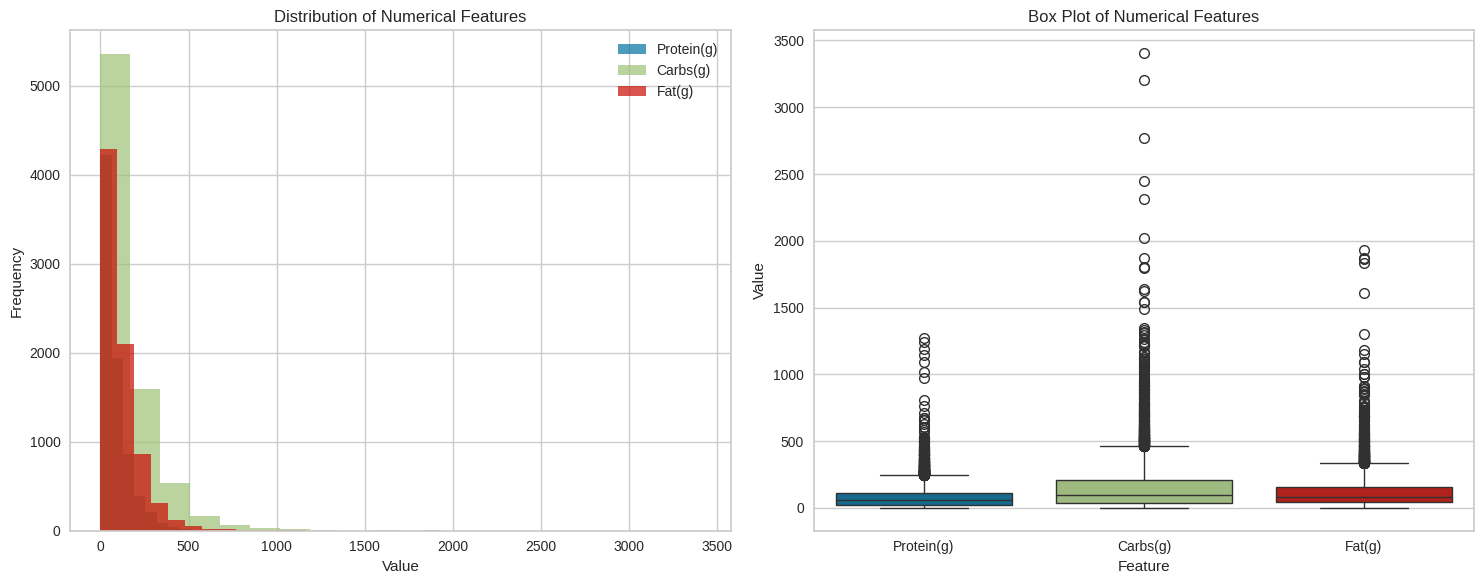

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Histogram
for column in ['Protein(g)', 'Carbs(g)', 'Fat(g)']:
    axes[0].hist(df[column], bins=20, alpha=0.7, label=column)
axes[0].set_title('Distribution of Numerical Features')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
sns.boxplot(data=df[['Protein(g)', 'Carbs(g)', 'Fat(g)']], ax=axes[1])
axes[1].set_title('Box Plot of Numerical Features')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Value')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

####**4.Visualisasi korelasi**
nilai **korelasi** tertinggi dimiliki antara protein dan fat dengan nilai 0.47 ini berarti nilai protein dan fat cenderung meningkat secara bersamaan

In [7]:
correlation_matrix = df[['Protein(g)', 'Carbs(g)', 'Fat(g)']].corr()
print(correlation_matrix)

            Protein(g)  Carbs(g)    Fat(g)
Protein(g)    1.000000  0.155682  0.478012
Carbs(g)      0.155682  1.000000  0.269059
Fat(g)        0.478012  0.269059  1.000000


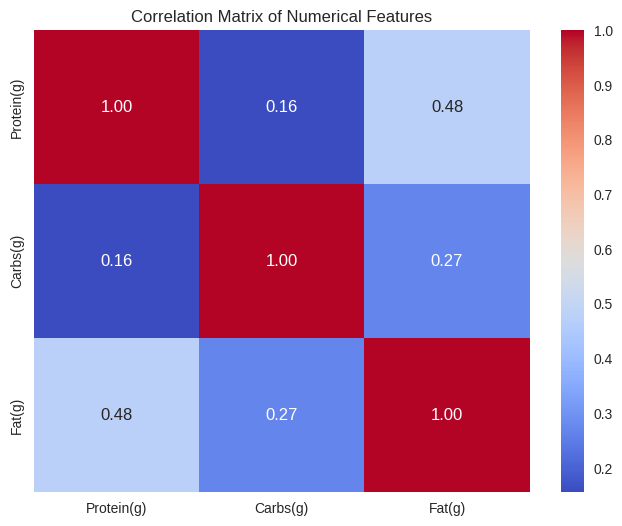

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

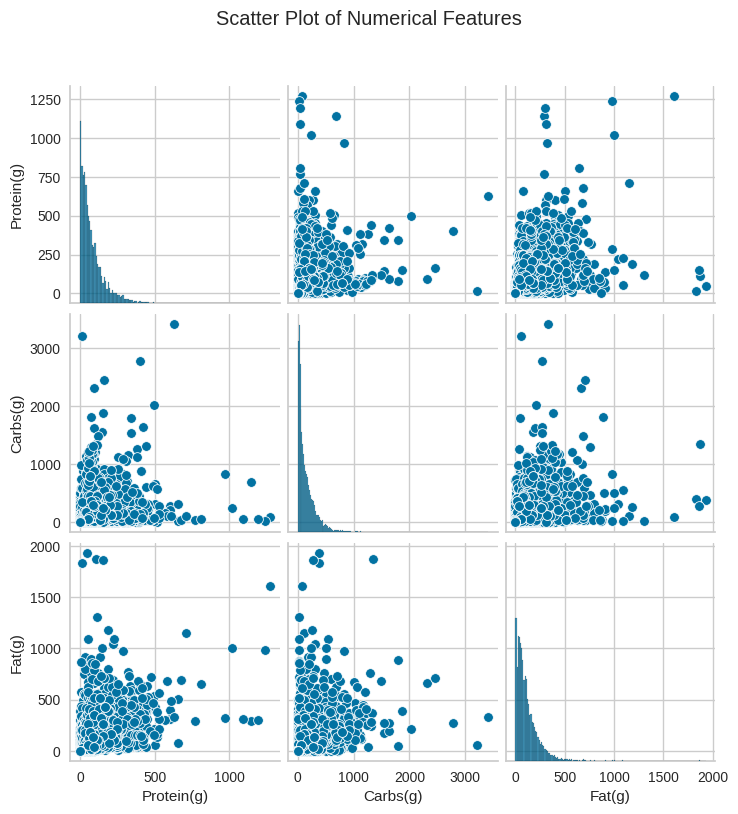

In [9]:
g = sns.pairplot(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])    #g disini untuk menangkap niali plot
g.fig.suptitle('Scatter Plot of Numerical Features', y=1.08)  # Adjust y to move title up
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

####**1. Feature Selection**
Drop fitur yang tidak relevan

In [10]:
df = df.drop(columns=['Recipe_name','Extraction_day', 'Extraction_time'])

df

,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,american,5.22,1.29,3.20
1,paleo,south east asian,181.55,28.62,146.14
2,paleo,american,30.91,302.59,96.76
3,paleo,mexican,9.62,75.78,59.89
4,paleo,chinese,39.84,54.08,71.55
...,...,...,...,...,...
7801,dash,italian,85.20,288.14,137.15
7802,dash,american,141.98,123.18,323.50
7803,dash,world,0.01,0.39,0.00
7804,dash,american,155.38,239.88,260.84


####**2. Drop Duplicates**
sebanyak 171 rows duplikat di hapus

In [11]:
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
29,paleo,french,78.59,290.10,84.95
77,paleo,american,189.35,143.25,300.66
80,paleo,american,46.07,261.60,147.50
286,paleo,italian,96.21,128.43,115.48
354,paleo,chinese,39.84,54.08,71.55
...,...,...,...,...,...
7801,dash,italian,85.20,288.14,137.15
7802,dash,american,141.98,123.18,323.50
7803,dash,world,0.01,0.39,0.00
7804,dash,american,155.38,239.88,260.84


In [12]:
df.drop_duplicates(inplace=True)

####**3. Binning**
fitur kategorikal cuisine_type dikelompokkan berdasarkan geografi nya sehingga mengurangi kompleksitas data

In [13]:
for column in df.select_dtypes(include=['object']).columns: # pilih kolom bertipe 'object'
       print(f"\nColumn: {column}")
       print("Unique Values:", df[column].unique())
       print("Value Counts:\n", df[column].value_counts())


Column: Diet_type
Unique Values: ['paleo' 'vegan' 'keto' 'mediterranean' 'dash']
Value Counts:
 Diet_type
dash             1704
mediterranean    1694
vegan            1499
keto             1493
paleo            1245
Name: count, dtype: int64

Column: Cuisine_type
Unique Values: ['american' 'south east asian' 'mexican' 'chinese' 'mediterranean'
 'italian' 'french' 'indian' 'nordic' 'eastern europe' 'central europe'
 'kosher' 'british' 'caribbean' 'south american' 'middle eastern' 'asian'
 'japanese' 'world']
Value Counts:
 Cuisine_type
american            2852
mediterranean       1689
italian              783
french               590
world                248
british              237
mexican              221
nordic               147
south east asian     146
south american       135
asian                125
chinese              118
indian                92
middle eastern        91
eastern europe        53
japanese              49
central europe        34
caribbean             18
kosher  

In [14]:
def group_cuisine(cuisine):
    if cuisine in ["american", "british", "mexican", "south american"]:
        return "Amerika"
    elif cuisine in ["mediterranean", "italian", "french", "nordic", "eastern europe", "central europe"]:
        return "Eropa"
    elif cuisine in ["asian","south east asian", "chinese", "indian", "japanese", "middle eastern"]:
        return "Asia"
    elif cuisine in ["caribbean", "kosher", "world"]:
        return "World"
    else:
        return "Other"  # Handling untuk cuisine yang tidak terdefinisi

df['Cuisine_Group'] = df['Cuisine_type'].str.lower().apply(group_cuisine)
df = df.drop(columns=['Cuisine_type'])

In [15]:
for column in df.select_dtypes(include=['object']).columns: # pilih kolom bertipe 'object'
       print(f"\nColumn: {column}")
       print("Unique Values:", df[column].unique())
       print("Value Counts:\n", df[column].value_counts())


Column: Diet_type
Unique Values: ['paleo' 'vegan' 'keto' 'mediterranean' 'dash']
Value Counts:
 Diet_type
dash             1704
mediterranean    1694
vegan            1499
keto             1493
paleo            1245
Name: count, dtype: int64

Column: Cuisine_Group
Unique Values: ['Amerika' 'Asia' 'Eropa' 'World']
Value Counts:
 Cuisine_Group
Amerika    3445
Eropa      3296
Asia        621
World       273
Name: count, dtype: int64


####**4. Handling Outlier**
menghapus outlier dengan IQR method

In [16]:
numeric_features = df.select_dtypes(include=['number'])
numeric_features

,Protein(g),Carbs(g),Fat(g)
0,5.22,1.29,3.20
1,181.55,28.62,146.14
2,30.91,302.59,96.76
3,9.62,75.78,59.89
4,39.84,54.08,71.55
...,...,...,...
7786,85.20,288.14,137.15
7787,141.98,123.18,323.50
7788,0.01,0.39,0.00
7789,155.38,239.88,260.84


In [17]:
kategorical_features = df.select_dtypes(include=['object'])
kategorical_features

,Diet_type,Cuisine_Group
0,paleo,Amerika
1,paleo,Asia
2,paleo,Amerika
3,paleo,Amerika
4,paleo,Asia
...,...,...
7786,dash,Eropa
7787,dash,Amerika
7788,dash,World
7789,dash,Amerika


In [18]:
numeric_columns = ['Protein(g)', 'Carbs(g)', 'Fat(g)']

Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

display(lower_bound)
display(upper_bound)

,0
Protein(g),-107.9600
Carbs(g),-218.2675
Fat(g),-134.3650


,0
Protein(g),245.1600
Carbs(g),460.6725
Fat(g),333.9150


In [19]:
# Filter data yang berada di luar batas atas dan bawah
df = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

####**5. Normalisasi**
mengubah nilai pada fitur numeric sehingga memiliki skala 0 hingga 1

In [20]:
df = df.reset_index(drop=True) #reset karena ada beberapa baris yang dihapus (misalnya, outlier atau duplikat),sehingga indeks tidak berurutan dari 0 hingga 7790.

In [21]:
scaler = MinMaxScaler()  # Inisialisasi objek MinMaxScaler
df.loc[:, numeric_columns] = scaler.fit_transform(df.loc[:, numeric_columns])

In [22]:
df.head()

,Diet_type,Protein(g),Carbs(g),Fat(g),Cuisine_Group
0,paleo,0.021314,0.002671,0.009602,Amerika
1,paleo,0.741293,0.062010,0.438490,Asia
2,paleo,0.126210,0.656860,0.290326,Amerika
3,paleo,0.039280,0.164405,0.179699,Amerika
4,paleo,0.162672,0.117289,0.214684,Asia


####**6. Encoding Data Kategorikal**
menerapkan One-Hot Encoding pada kolom kategorikal diet_type dan cuisine_group

In [23]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # inisialisasi lalu parameter sparse=False agar nilai 0 benar-benar disimpan

categorical_features = ['Diet_type', 'Cuisine_Group']
encoder.fit(df[categorical_features])

# Ubah kolom kategorikal menjadi fitur one-hot encoded
encoded_features = encoder.transform(df[categorical_features])

# Buat DataFrame dari fitur yang dienkode
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Gabungkan DataFrame fitur yang dienkode dengan DataFrame asli
df = pd.concat([df, encoded_df], axis=1)

# Hapus kolom kategorikal asli
df.drop(categorical_features, axis=1, inplace=True)

In [24]:
df.head()

,Protein(g),Carbs(g),Fat(g),Diet_type_dash,Diet_type_keto,Diet_type_mediterranean,Diet_type_paleo,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Asia,Cuisine_Group_Eropa,Cuisine_Group_World
0,0.021314,0.002671,0.009602,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.741293,0.062010,0.438490,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.126210,0.656860,0.290326,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.039280,0.164405,0.179699,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.162672,0.117289,0.214684,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

####**1. K-Means**
menentukan jumlah centroid dengan elbow method

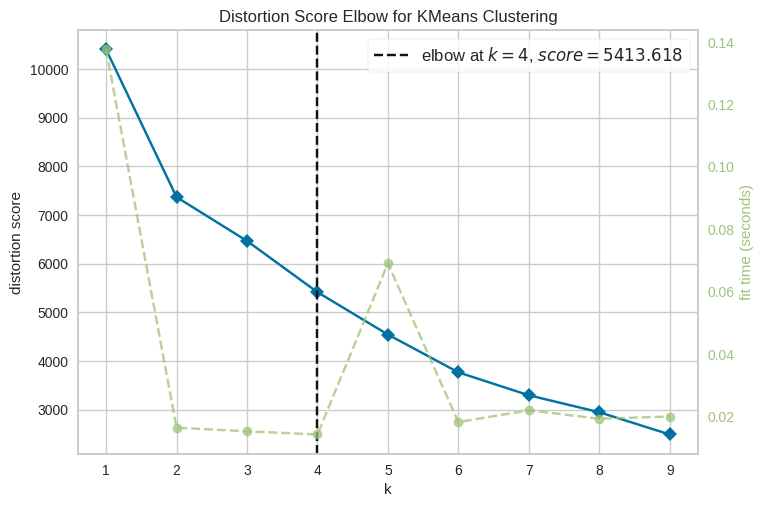

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

####**2. Latih model K-Means**
latih dengan k=4 berdasarkan Elbow

In [26]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

clustered_df = df.copy()  # Membuat salinan df untuk menghindari modifikasi langsung
clustered_df['Cluster'] = labels  # Menambahkan label cluster sebagai kolom baru

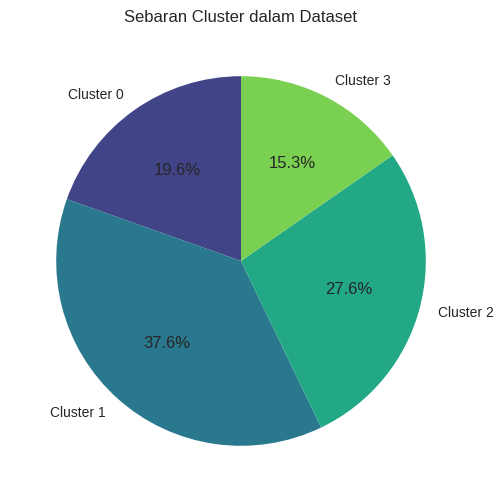

In [27]:
# Hitung jumlah data per cluster
cluster_counts = clustered_df['Cluster'].value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts.values,
        labels=[f'Cluster {cluster}' for cluster in cluster_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("viridis", n_colors=len(cluster_counts)))
        #colors=plt.cm.viridis(cluster_counts.index / cluster_counts.index.max()))

# Atur judul
plt.title('Sebaran Cluster dalam Dataset')

# Tampilkan plot
plt.show()

In [28]:
print("Jumlah Data per Cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data")

Jumlah Data per Cluster:
Cluster 0: 1304 data
Cluster 1: 2504 data
Cluster 2: 1836 data
Cluster 3: 1020 data


In [29]:
clustered_df.head()

,Protein(g),Carbs(g),Fat(g),Diet_type_dash,Diet_type_keto,Diet_type_mediterranean,Diet_type_paleo,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Asia,Cuisine_Group_Eropa,Cuisine_Group_World,Cluster
0,0.021314,0.002671,0.009602,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
1,0.741293,0.062010,0.438490,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0.126210,0.656860,0.290326,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
3,0.039280,0.164405,0.179699,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,0.162672,0.117289,0.214684,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

####**1. Evaluasi Silhouette Score**
>`Silhouette Score: 0.3436887805776318`

nilai yang diperoleh sangat rendah, sehingga diputuskan untuk mengganti model yang lebih robust

In [30]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3436887805776318


## **c. Feature Selection**
untuk melakukan feature selecetion kali ini, diperlukan label cluster dari model yang dipilih sehingga dilakukan modeling terlebih dahulu

####**1. Latih model DBSCAN**

In [31]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5) # You might need to tune these parameters
dbscan.fit(df)

# mengambil label cluster
dbscan_df = df.copy()
dbscan_df['Cluster'] = dbscan.labels_

# analisis jumlah data tiap cluster
cluster_counts = dbscan_df['Cluster'].value_counts()
cluster_counts


,count
Cluster,
12,1294
4,832
8,715
16,663
0,568
9,465
17,461
2,449
6,248


####**2. Feature Selcetion**
menggunakan teknik *feature importance* dengan melibatkan Random Forest sebagai metrik penentu fitur yang paling informatif dalam konteks prediksi label cluster. dengan begitu diperolehlah
>`filtered_df = Diet_type_mediterranean, Diet_type_vegan, Carbs(g), Fat(g), Protein(g), Cuisine_Group_Amerika, Cuisine_Group_Eropa`

In [32]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model using DBSCAN cluster labels as target
X = dbscan_df.drop(columns=['Cluster'])  # Features (exclude cluster labels)
y = dbscan_df['Cluster']  # Target (cluster labels)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)

,Feature,Importance
5,Diet_type_mediterranean,0.147709
8,Cuisine_Group_Amerika,0.137538
10,Cuisine_Group_Eropa,0.123751
4,Diet_type_keto,0.116727
3,Diet_type_dash,0.115627
6,Diet_type_paleo,0.114689
7,Diet_type_vegan,0.113706
9,Cuisine_Group_Asia,0.058202
11,Cuisine_Group_World,0.026279
1,Carbs(g),0.017877


memilih filter dengan importance tinggi dan sesuai dengan konteks dataset, sehingga fitur yang dipilih adalah:

>`filtered_df = Diet_type_mediterranean, Diet_type_vegan, Carbs(g), Fat(g), Protein(g), Cuisine_Group_Amerika, Cuisine_Group_Eropa`

2 fitur diet_type dipilih untuk dibandingkan, 3 fitur numerik dipilih karena telah menjadi tujuan awal analisis, dan 2 fitur cuisine_group untuk dibandingkan


In [33]:
# Filter Cuisine_Group dan Diet_type
filtered_df = df[
    (df['Cuisine_Group_Asia'] == 0) &
    (df['Cuisine_Group_World'] == 0) &
    (df['Diet_type_paleo'] == 0) &
    (df['Diet_type_keto'] == 0) &
    (df['Diet_type_dash'] == 0)
]

# Hapus kolom yang tidak diperlukan (opsional)
columns_to_drop = ['Cuisine_Group_Asia', 'Cuisine_Group_World',
                   'Diet_type_paleo', 'Diet_type_keto', 'Diet_type_dash']
filtered_df = filtered_df.drop(columns=columns_to_drop)

# Reset indeks (opsional)
filtered_df = filtered_df.reset_index(drop=True)

# ... (lanjutkan dengan kode Anda) ... kunciiiiiii

In [34]:
filtered_df

,Protein(g),Carbs(g),Fat(g),Diet_type_mediterranean,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Eropa
0,0.189294,0.183381,0.127850,0.0,1.0,1.0,0.0
1,0.170389,0.312330,0.221675,0.0,1.0,1.0,0.0
2,0.423952,0.179082,0.417967,0.0,1.0,1.0,0.0
3,0.298273,0.578240,0.500000,0.0,1.0,1.0,0.0
4,0.584419,0.452396,0.569671,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
2514,0.292679,0.203292,0.348116,1.0,0.0,1.0,0.0
2515,0.398595,0.278742,0.252820,1.0,0.0,0.0,1.0
2516,0.037973,0.040580,0.085064,1.0,0.0,0.0,1.0
2517,0.161080,0.172482,0.089924,1.0,0.0,0.0,1.0


####**3. Pembangunan Model Clustering DBSCAN**

####**4. Menilai skor model sebelum Feature Selection**
benar saja, DBSCAN memiliki skor silhouette lebih tinggi daripada model K-Means sebelumnya

In [35]:
silhouette_avg_dbscan = silhouette_score(df, dbscan.labels_)
print("Silhouette Score (DBSCAN):", silhouette_avg_dbscan)

Silhouette Score (DBSCAN): 0.6947031334793072


####**5. Hyperparameter Tuning dengan Grid Search**
grid search dengan variabel eps yang sesuai dengan nilai data karena telah dinormalisasi, dan min_samples yang arbiter dipilih.

In [36]:
eps_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])  # Use np.array to create an array with specified values
min_samples = np.array([3, 5, 7, 9, 11, 13]) # Use np.array to create an array with specified values

DBSCAN_params = list(product(eps_values, min_samples))

In [37]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(filtered_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(filtered_df, DBS_clustering.labels_))



####**6. Visualisasi hasil Grid Search**
visualisasi heatmap agar dapat memilih kombinasi min_samples dan eps dengan skor silhouette tertinggi dengan jumlah cluster yang sesuai

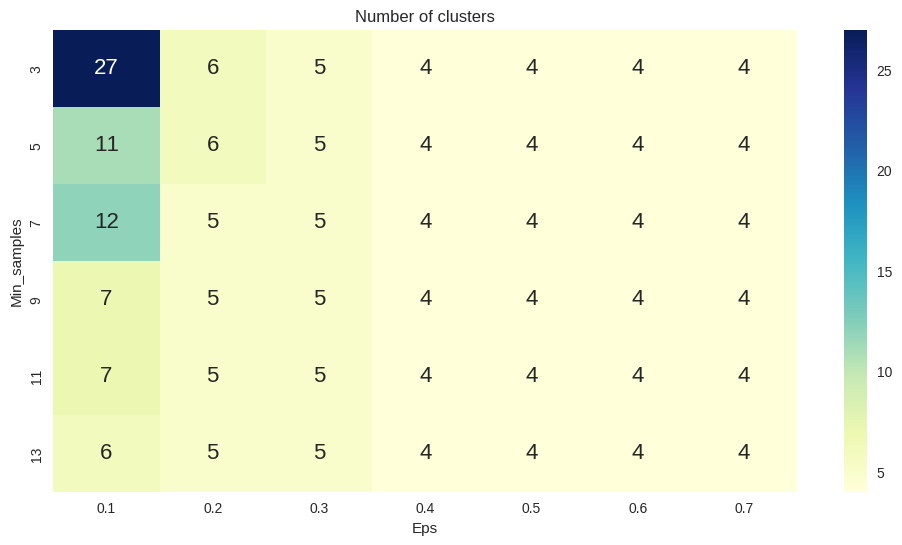

In [38]:

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()


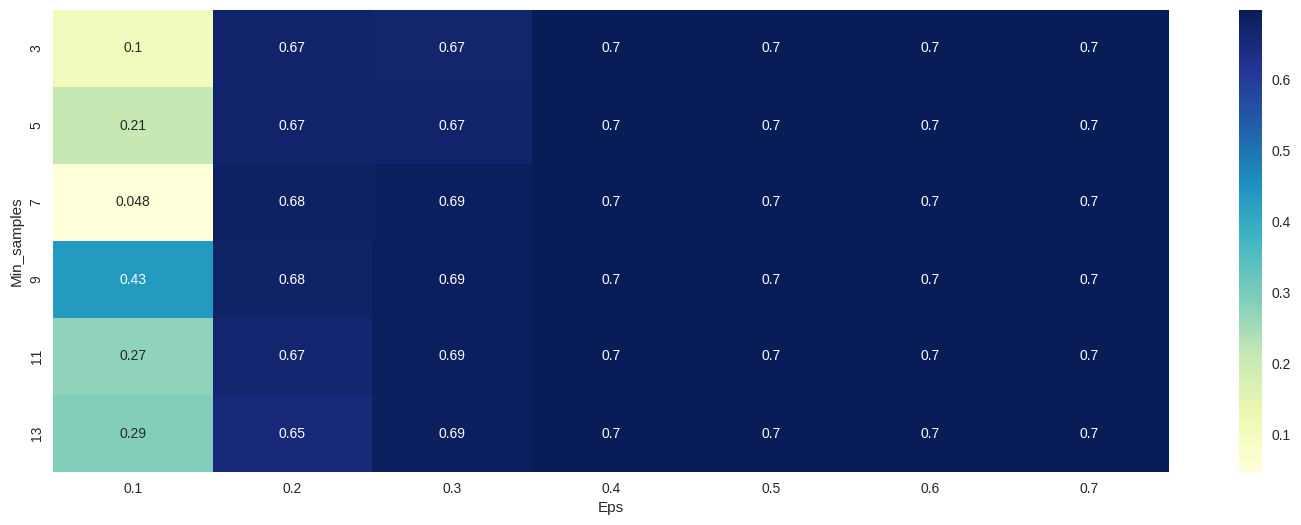

In [39]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

####**7. Implementasi DBSCAN**
Latih ulang model DBSCAN dengan hyperparameter yang telah dipilih melalui teknik grid search tuning.
>`eps = 0.4, min_samples = 9`

In [40]:
min_samples = 9
eps = 0.4

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(filtered_df)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to new df
dbscan_df = filtered_df.copy()
dbscan_df['Cluster_DBSCAN'] = labels

# Analyze the results (e.g., number of clusters, cluster sizes)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points (-1)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 4


In [41]:
dbscan_df.head()

,Protein(g),Carbs(g),Fat(g),Diet_type_mediterranean,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Eropa,Cluster_DBSCAN
0,0.189294,0.183381,0.127850,0.0,1.0,1.0,0.0,0
1,0.170389,0.312330,0.221675,0.0,1.0,1.0,0.0,0
2,0.423952,0.179082,0.417967,0.0,1.0,1.0,0.0,0
3,0.298273,0.578240,0.500000,0.0,1.0,1.0,0.0,0
4,0.584419,0.452396,0.569671,0.0,1.0,1.0,0.0,0


####**8. Evaluasi skor Silhouette model DBSCAN**
menggunakan feature_df, Silhouette Score berhasil menigkat **0.74**
>`Silhouette Score (DBSCAN): 0.7499447754933825`

In [42]:
silhouette_avg = silhouette_score(filtered_df, labels)  # menilai filtered_df terhadap labels dari DBSCAN
print("Silhouette Score (DBSCAN):", silhouette_avg)

Silhouette Score (DBSCAN): 0.6970943972073879


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

## **d. Visualisasi Hasil Clustering**
Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [43]:
cluster_groups = dbscan_df.groupby('Cluster_DBSCAN')

In [44]:
cluster_stats = cluster_groups[['Protein(g)', 'Carbs(g)', 'Fat(g)']].describe()
print(cluster_stats)

               Protein(g)                                                    \
                    count      mean       std       min       25%       50%   
Cluster_DBSCAN                                                                
0                   832.0  0.185077  0.141385  0.001552  0.080672  0.151811   
1                   248.0  0.221205  0.148419  0.001470  0.109765  0.193071   
2                  1294.0  0.315454  0.228717  0.001021  0.135856  0.260769   
3                   145.0  0.338418  0.249370  0.007350  0.137806  0.299089   

                                   Carbs(g)            ...            \
                     75%       max    count      mean  ...       75%   
Cluster_DBSCAN                                         ...             
0               0.260075  0.965375    832.0  0.423720  ...  0.626229   
1               0.293189  0.829080    248.0  0.440429  ...  0.626474   
2               0.452615  0.995182   1294.0  0.291483  ...  0.425674   
3             

In [45]:
cluster_counts = Counter(labels) #menghitung label cluster dbscan

for cluster, count in cluster_counts.items():
    if cluster != -1:  # Exclude noise points
        print(f"Cluster {cluster}: {count} data points")

Cluster 0: 832 data points
Cluster 1: 248 data points
Cluster 2: 1294 data points
Cluster 3: 145 data points


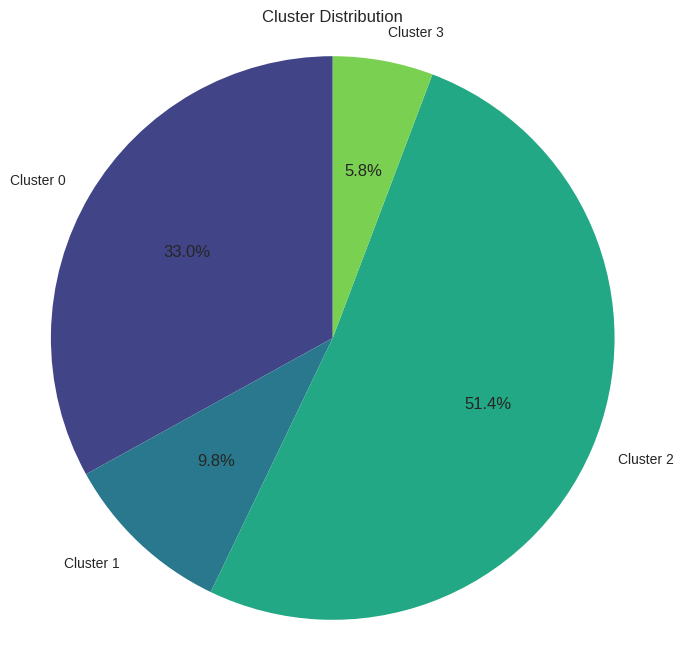

In [46]:
# Prepare data for the pie chart
cluster_labels = [f'Cluster {cluster}' for cluster in cluster_counts if cluster != -1]  # Exclude noise points
cluster_sizes = [count for cluster, count in cluster_counts.items() if cluster != -1]

colors = sns.color_palette('viridis', n_colors=len(cluster_labels))
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes, labels=cluster_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

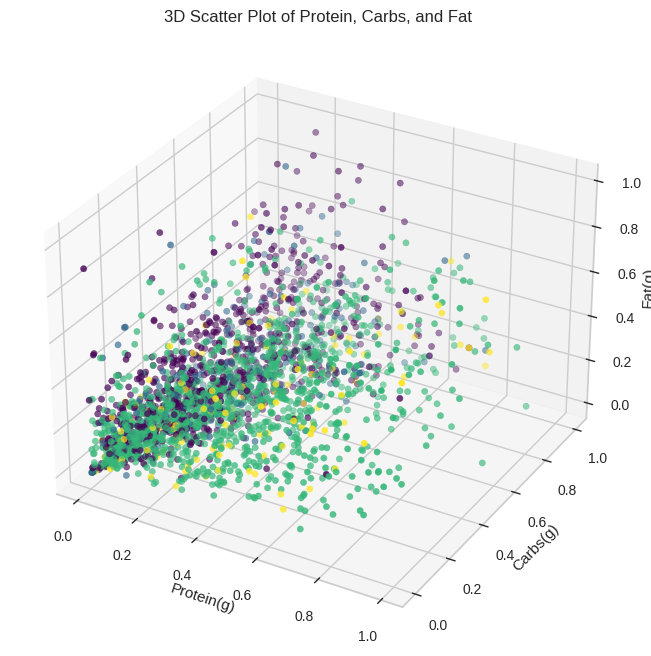

In [47]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with viridis colormap and no colorbar
scatter = ax.scatter(dbscan_df['Protein(g)'], dbscan_df['Carbs(g)'], dbscan_df['Fat(g)'],
                     c=dbscan_df['Cluster_DBSCAN'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Protein(g)')
ax.set_ylabel('Carbs(g)')
ax.set_zlabel('Fat(g)')
ax.set_title('3D Scatter Plot of Protein, Carbs, and Fat')


plt.show()

In [48]:
import plotly.express as px

fig = px.parallel_coordinates(dbscan_df, color='Cluster_DBSCAN',
                              dimensions=['Protein(g)', 'Carbs(g)', 'Fat(g)',
                                          'Diet_type_mediterranean', 'Diet_type_vegan',
                                          'Cuisine_Group_Amerika', 'Cuisine_Group_Eropa'],
                              title='Parallel Coordinates Plot of Recipe Clusters')

fig.show()

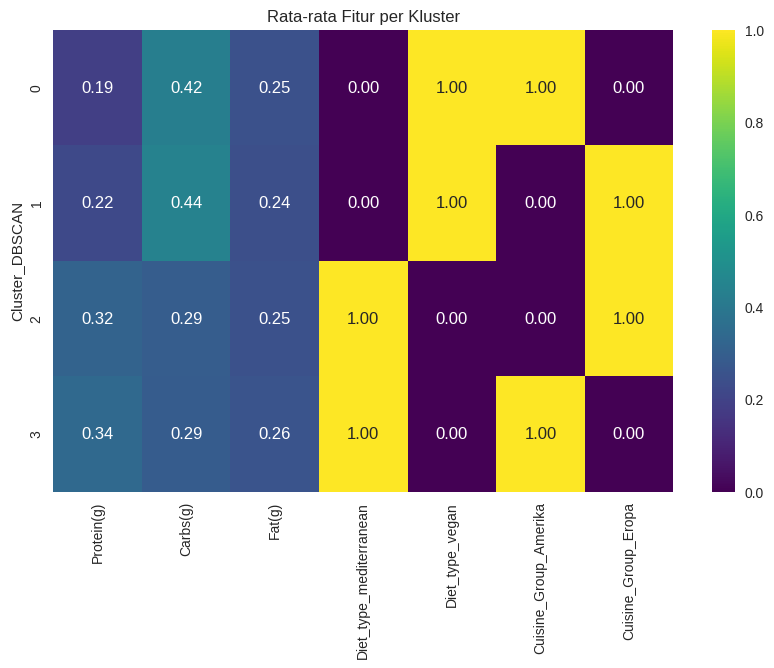

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung rata-rata fitur per kluster
cluster_means = dbscan_df.groupby('Cluster_DBSCAN')[['Protein(g)', 'Carbs(g)', 'Fat(g)',
                                                      'Diet_type_mediterranean', 'Diet_type_vegan',
                                                      'Cuisine_Group_Amerika', 'Cuisine_Group_Eropa']].mean()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt=".2f")
plt.title('Rata-rata Fitur per Kluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**
Tulis hasil interpretasinya di sini.
1. Cluster 1: Memiliki nilai rata-rata yang tinggi pada fitur **Carbs(g)** dan **Fat(g)**
2. Cluster 2: Mirip dengan kluster 0, dengan nilai rata-rata tinggi pada fitur **Carbs(g)** dan **Fat(g)**
3. Cluster 3: Memiliki nilai dominan pada fitur **Diet_type_mediterranean** dan **Cuisine_Group_Eropa**.
4. Cluster 4: Memiliki nilai dominan pada fitur **Diet_type_mediterranean** dan **Cuisine_Group_Amerika**.

Setelah melakukan clustering dan label telah dimasukkan kedalam cluster_groups, selanjutnya adalah mengembailkan data yang telah dinormalisasi ke bentuk aslinya.

In [50]:
# Inverse transform for numeric features
dbscan_df.loc[:, numeric_columns] = scaler.inverse_transform(dbscan_df.loc[:, numeric_columns])

# Display the DataFrame with inverse-transformed numeric features
dbscan_df.head()

,Protein(g),Carbs(g),Fat(g),Diet_type_mediterranean,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Eropa,Cluster_DBSCAN
0,46.36,84.52,42.61,0.0,1.0,1.0,0.0,0
1,41.73,143.91,73.88,0.0,1.0,1.0,0.0,0
2,103.83,82.54,139.30,0.0,1.0,1.0,0.0,0
3,73.05,266.38,166.64,0.0,1.0,1.0,0.0,0
4,143.13,208.42,189.86,0.0,1.0,1.0,0.0,0


In [51]:
# Hitung rata-rata fitur per kluster
cluster_means = dbscan_df.groupby('Cluster_DBSCAN').mean()

# Tampilkan rata-rata fitur per kluster
cluster_means


,Protein(g),Carbs(g),Fat(g),Diet_type_mediterranean,Diet_type_vegan,Cuisine_Group_Amerika,Cuisine_Group_Eropa
Cluster_DBSCAN,,,,,,,
0,45.327224,195.212873,82.364892,0.0,1.0,1.0,0.0
1,54.175403,202.908589,80.394113,0.0,1.0,0.0,1.0
2,77.257960,134.308145,82.298787,1.0,0.0,0.0,1.0
3,82.882000,132.639034,86.595103,1.0,0.0,1.0,0.0


### Analisis Karakteristik Cluster dari Model dbscan

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model dbscan.

## Cluster 1:
- **Rata-rata Protein(g):** 45,32  
- **Rata-rata Carbs(g):** 195,21  
- **Rata-rata Fat(g):** 82,36  
- **Analisis:** Kluster ini memiliki skor tinggi pada protein, karbohidrat, dan lemak, menunjukkan bahwa makanan dalam kluster ini memiliki kandungan makro nutrisi yang seimbang.

## Cluster 2:
- **Rata-rata Protein(g):** 54,17  
- **Rata-rata Carbs(g):** 202,90  
- **Rata-rata Fat(g):** 80,39
- **Analisis:**  Kluster ini juga memiliki skor tinggi pada protein, karbohidrat, dan lemak. Namun, skornya lebih rendah dibandingkan dengan Kluster 0, menunjukkan bahwa makanan dalam kluster ini mungkin sedikit lebih rendah kalori.

## Cluster 3:
- **Rata-rata Protein(g):** 77,25  
- **Rata-rata Carbs(g):** 134,30  
- **Rata-rata Fat(g):** 82,29
- **Analisis:** Kluster ini memiliki skor tinggi pada Diet_type_mediterranean, yang menunjukkan bahwa makanan dalam kluster ini cenderung mengikuti diet Mediterania.

## Cluster 4:
- **Rata-rata Protein(g):** 82,88  
- **Rata-rata Carbs(g):** 132,63  
- **Rata-rata Fat(g):** 86,59
- **Analisis:** Kluster ini memiliki skor tinggi pada Diet_type_mediterranean dan Cuisine_Group_Amerika, yang menunjukkan bahwa makanan dalam kluster ini cenderung mengikuti diet Mediterania dan berasal dari Amerika.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
dbscan_df.to_csv('clustered_data.csv', index=False)